Collecting the data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data = pd.read_csv("Titanic.csv")
print(titanic_data.shape) #print the shape of our dataset
titanic_data.head(5) #display the first five rows of our data

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

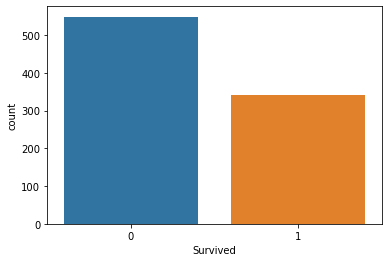

In [2]:
sns.countplot(x="Survived",data = titanic_data)

#### this tells us that the minority of the passengers survived about a half of the passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

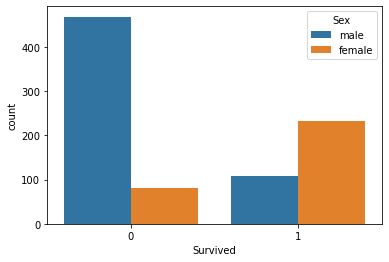

In [3]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

##### zero is did not survive and one is survived, so this tells us that the majority of male did not survided compared to the 
##### of females that survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

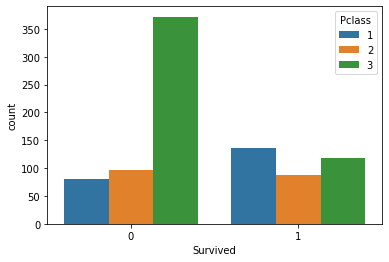

In [4]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

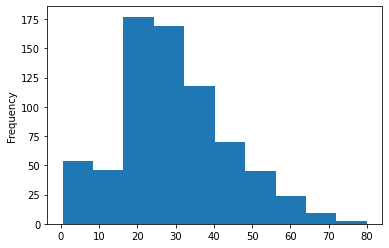

In [ ]:
titanic_data['Age'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

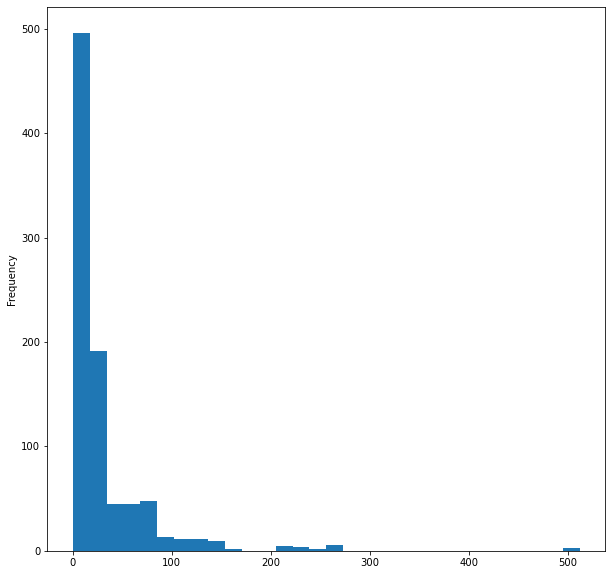

In [ ]:
titanic_data['Fare'].plot.hist(bins=30, figsize=(10,10))

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data cleaning

Let's clean our dataset by removing all the NAN values and all the unnecessary columns that we
are not going to build our model upon

In [ ]:
#after removing the columns using a spreadsheet let's visualize the data again

titanic_data = pd.read_csv(r'C:\Users\Omega Joctan\AppData\Roaming\MetaQuotes\Terminal\892B47EBC091D6EF95E3961284A76097\MQL5\Files\titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
mean_value = titanic_data['Age'].mean()
titanic_data['Age'].fillna(value=mean_value, inplace= True)

titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
5,6,0,3,male,29.699118,0,0,8.4583
6,7,0,1,male,54.000000,0,0,51.8625
7,8,0,3,male,2.000000,3,1,21.0750
8,9,1,3,female,27.000000,0,2,11.1333
9,10,1,2,female,14.000000,1,0,30.0708


In [ ]:
#check if there are nan values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [ ]:
Sex = pd.get_dummies(titanic_data['Sex'], drop_first=True) #put the sex column into one dimensional array
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
p_class = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
p_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
titanic_data = pd.concat([titanic_data,Sex,p_class],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,2,3
0,1,0,3,male,22.0,1,0,7.2500,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,1,0,1


In [ ]:
titanic_data.drop(['PassengerId','Pclass','Sex'], axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


## Train Data

In [ ]:
x = titanic_data['Age'].values.reshape(-1,1)
y = titanic_data['Survived'].values.reshape(-1,1)

In [ ]:
# x = titanic_data.drop("Survived",axis=1)
# y= titanic_data["Survived"]

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

logreg = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
logreg.fit(x,y)

C:\Users\Omega Joctan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
predictions = logreg.predict(x)

In [ ]:
print(" intercept ",logreg.intercept_,"slope", logreg.coef_)

 intercept  [-0.13940752] slope [[-0.01130808]]


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)
predictions = lr.predict(x) 
print(predictions)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
classification_report(y,predictions)

C:\Users\Omega Joctan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omega Joctan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omega Joctan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.62      1.00      0.76       549\n           1       0.00      0.00      0.00       342\n\n    accuracy                           0.62       891\n   macro avg       0.31      0.50      0.38       891\nweighted avg       0.38      0.62      0.47       891\n'

In [ ]:
confusion_matrix(y,predictions)

array([[549,   0],
       [342,   0]], dtype=int64)

In [ ]:
accuracy_score(y,predictions)

0.6161616161616161

In [ ]:
logreg.predict_proba(x)

array([[0.59584578, 0.40415422],
       [0.63855887, 0.36144113],
       [0.60668948, 0.39331052],
       ...,
       [0.61662504, 0.38337496],
       [0.60668948, 0.39331052],
       [0.62275684, 0.37724316]])

In [ ]:
log_loss(y,logreg.predict_proba(x))

0.6634560730406619

In [ ]:
data = pd.read_csv(r'C:\Users\Omega Joctan\AppData\Roaming\MetaQuotes\Terminal\892B47EBC091D6EF95E3961284A76097\MQL5\Files\titanic_predicted.csv')
data.head(10)

,Original,Predicted
0,0,0
1,0,1
2,0,1
3,1,0
4,0,0
5,0,0
6,1,1
7,0,1
8,1,0
9,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(x,y)
predictions = lr.predict(x) 
print(f"coefficient of x= {lr.coef_} Intecept = {lr.intercept_}")

coefficient of x= [[-0.00261254]] Intecept = [0.46142854]
